In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time

from tyssue.generation import generate_ring
from tyssue.solvers.sheet_vertex_solver import Solver
from tyssue.config.draw import sheet_spec

from tyssue_taylor.models.annular import AnnularGeometry as geom
from tyssue_taylor.models.annular import model
from tyssue_taylor.segmentation.segment2D import normalize_scale
from tyssue_taylor.models.display import (print_tensions, rendering_results,
                                          rendering_convergence_results,
                                          plot_force_inference, create_organo)
from tyssue_taylor.adjusters.adjust_annular import prepare_tensions, adjust_parameters
from tyssue_taylor.adjusters.cost_functions import _distance
from tyssue_taylor.adjusters.force_inference import infer_forces, opt_sum_lambda

In [6]:
def spread_distrib(array, factor):
    m = np.mean(array)
    ecart_moyenne = array - np.full(array.shape, m)
    new_array = array + factor*ecart_moyenne
    return new_array

Reseting column is_alive of the face dataset with new specs
Reseting column ux of the edge dataset with new specs
Reseting column uy of the edge dataset with new specs
Reseting column is_active of the vert dataset with new specs
Reseting column is_alive of the face dataset with new specs
Reseting column prefered_area of the face dataset with new specs
Reseting column area_elasticity of the face dataset with new specs
Reseting column ux of the edge dataset with new specs
Reseting column uy of the edge dataset with new specs
Reseting column uz of the edge dataset with new specs
Reseting column line_tension of the edge dataset with new specs
Reseting column is_active of the edge dataset with new specs
Reseting column adhesion_strength of the vert dataset with new specs
Reseting column x_ecm of the vert dataset with new specs
Reseting column y_ecm of the vert dataset with new specs
Reseting column is_active of the vert dataset with new specs


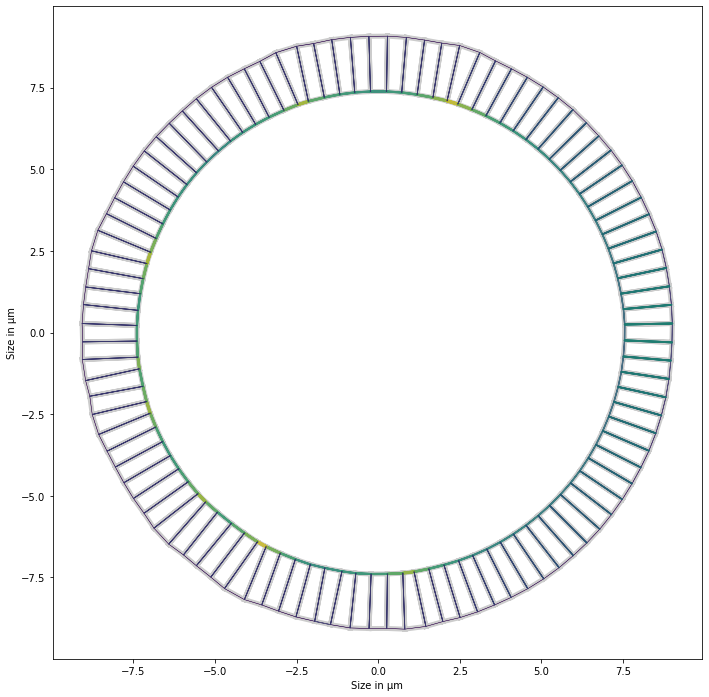

In [7]:
nf, r_in, r_out = (100, 1, 1.2)
seed = 1
organo = create_organo(nf, r_in, r_out)
lat_tens = spread_distrib(np.array([
    0.050, 0.049, 0.048, 0.047, 0.046,
    0.045, 0.044, 0.043, 0.042, 0.041,
    0.040, 0.039, 0.038, 0.037, 0.036,
    0.035, 0.034, 0.033, 0.032, 0.031,
    0.03, 0.03, 0.03, 0.03, 0.03,
    0.03, 0.03, 0.03, 0.03, 0.03,
    0.03, 0.03, 0.03, 0.03, 0.03,
    0.03, 0.03, 0.03, 0.03, 0.03,
    0.03, 0.03, 0.03, 0.03, 0.03,
    0.03, 0.03, 0.03, 0.03, 0.03,
    0.03, 0.03, 0.03, 0.03, 0.03,
    0.03, 0.03, 0.03, 0.03, 0.03,
    0.03, 0.03, 0.03, 0.03, 0.03,
    0.03, 0.03, 0.03, 0.03, 0.03,
    0.03, 0.03, 0.03, 0.03, 0.03,
    0.03, 0.03, 0.03, 0.03, 0.03,
    0.031, 0.032, 0.033, 0.034, 0.035,
    0.036, 0.037, 0.038, 0.039, 0.04,
    0.041, 0.042, 0.043, 0.044, 0.045,
    0.046, 0.047, 0.048, 0.049, 0.05,
]), 2) + 0.01

specs = {
    'face':{
        'is_alive': 1,
        'prefered_area':  np.array([
    0.09, 0.085, 0.09, 0.095, 0.095,
    0.10, 0.095, 0.09, 0.095, 0.095,
    0.10, 0.105, 0.10, 0.105, 0.11,
    0.105, 0.10, 0.095, 0.09, 0.095,
    0.09, 0.085, 0.09, 0.095, 0.095,
    0.10, 0.095, 0.09, 0.095, 0.095,
    0.10, 0.105, 0.10, 0.105, 0.11,
    0.105, 0.10, 0.095, 0.09, 0.095,
    0.09, 0.085, 0.09, 0.095, 0.095,
    0.10, 0.095, 0.09, 0.095, 0.095,
    0.10, 0.105, 0.10, 0.105, 0.11,
    0.105, 0.10, 0.095, 0.09, 0.095,
    0.09, 0.085, 0.09, 0.095, 0.095,
    0.10, 0.095, 0.09, 0.095, 0.095,
    0.10, 0.105, 0.10, 0.105, 0.11,
    0.105, 0.10, 0.095, 0.09, 0.095,
    0.09, 0.085, 0.09, 0.095, 0.095,
    0.10, 0.095, 0.09, 0.095, 0.095,
    0.10, 0.105, 0.10, 0.105, 0.11,
    0.105, 0.10, 0.095, 0.09, 0.095
])*2 + organo.face_df.area, 
        'area_elasticity': 1,},
    'edge':{        
        'ux': 0.,
        'uy': 0.,
        'uz': 0.,
        'line_tension': np.concatenate((spread_distrib(np.array([
                                        0.080, 0.081, 0.082, 0.083, 0.084,
                                        0.085, 0.086, 0.087, 0.088, 0.089,
                                        0.090, 0.091, 0.092, 0.093, 0.094,
                                        0.095, 0.096, 0.097, 0.100, 0.103,
                                        0.107, 0.115, 0.126, 0.115, 0.107,
                                        0.105, 0.103, 0.101, 0.099, 0.102,
                                        0.109, 0.120, 0.137, 0.121, 0.113,
                                        0.107, 0.115, 0.127, 0.116, 0.109,
                                        0.106, 0.105, 0.109, 0.118, 0.127,
                                        0.118, 0.111, 0.122, 0.111, 0.108,
                                        0.107, 0.105, 0.112, 0.119, 0.130,
                                        0.121, 0.111, 0.106, 0.103, 0.102,
                                        0.100, 0.099, 0.096, 0.098, 0.102,
                                        0.104, 0.106, 0.108, 0.117, 0.129,
                                        0.114, 0.109, 0.106, 0.103, 0.102,
                                        0.105, 0.108, 0.114, 0.124, 0.135,
                                        0.124, 0.116, 0.109, 0.106, 0.103,
                                        0.101, 0.099, 0.096, 0.095, 0.094,
                                        0.093, 0.091, 0.090, 0.089, 0.088,
                                        0.087, 0.085, 0.084, 0.083, 0.082
                                        ]), 1),
                                        np.array([
                                        0.03, 0.028, 0.026, 0.024, 0.022,
                                        0.02, 0.018, 0.016, 0.014, 0.012,
                                        0.011, 0.011, 0.011, 0.011, 0.01,
                                        0.01, 0.009, 0.01, 0.01, 0.01,
                                        0.009, 0.009, 0.009, 0.01, 0.01,
                                        0.011, 0.012, 0.03, 0.012, 0.011,
                                        0.01, 0.009, 0.01, 0.01, 0.011,
                                        0.011, 0.01, 0.009, 0.01, 0.01,
                                        0.011, 0.011, 0.01, 0.01, 0.01,
                                        0.009, 0.009, 0.009, 0.01, 0.01,
                                        0.01, 0.01, 0.009, 0.01, 0.01,
                                        0.011, 0.01, 0.011, 0.01, 0.011,
                                        0.011, 0.012, 0.012, 0.011, 0.011,
                                        0.011, 0.011, 0.012, 0.013, 0.014,
                                        0.013, 0.011, 0.011, 0.012, 0.011,
                                        0.01, 0.01, 0.011, 0.01, 0.009,
                                        0.009, 0.009, 0.01, 0.011, 0.011,
                                        0.01, 0.009, 0.009, 0.008, 0.01,
                                        0.012, 0.014, 0.016, 0.018, 0.020,
                                        0.022, 0.024, 0.026, 0.028, 0.03
                                        ]),
                                        np.concatenate((lat_tens, np.roll(lat_tens, -1)))
                                       )),
        'is_active': 1
        },
    'vert':{
        'adhesion_strength': 0.1,
        'x_ecm': organo.vert_df.x,
        'y_ecm': organo.vert_df.y,
        'is_active': 1
        },
    'settings': {
        'lumen_elasticity': 0.05,
        'lumen_prefered_vol': organo.settings['lumen_volume'] ,
        'lumen_volume': organo.settings['lumen_volume']
        }
    }

organo.update_specs(specs, reset=True)
#normalize_scale(organo, geom)

geom.update_all(organo)
Solver.find_energy_min(organo, geom, model)
print_tensions(organo, organo)

## Initialisation avec la méthode d'inférence de forces

In [8]:
np.corrcoef(organo.edge_df.line_tension, organo.edge_df.length)

array([[ 1.       , -0.2747943],
       [-0.2747943,  1.       ]])

### Recherche de la valeur optimale pour la somme des tensions

In [9]:
start = time.time()
opt_cst = opt_sum_lambda(organo, method="bounded")
end = time.time() - start
print("Solving time = ", end,
      "   |   x* = ", opt_cst)

ValueError: The `bounds` parameter is mandatory for method `bounded`.

### Application de la méthode d'inférence de force

Les tensions et les aires de préférences sont inférées. Plus précisément, les termes $A-A_0$ sont inférés.

En plus des contraintes usuelles de l'inférence de forces, on ajoute une contrainte par cellule imposant que la somme des tensions sur ses edges soit égale à une constante $C$.

Pour fixer cette constante, on utilise la formule de Farhadifar où les paramètres $\overline{\Lambda}$ et $\overline{A_0}$ sont calculé dans un organoïde symétrique (aussi appelé régulié).

Le système d'inférence de force est composé de $5N_f$ lignes et $4N_f+1$ colonnes. On le résoud avec NNLS pour garantir la non-négativité des tensions.


Distance from th org to exp org:  9.961241434348583


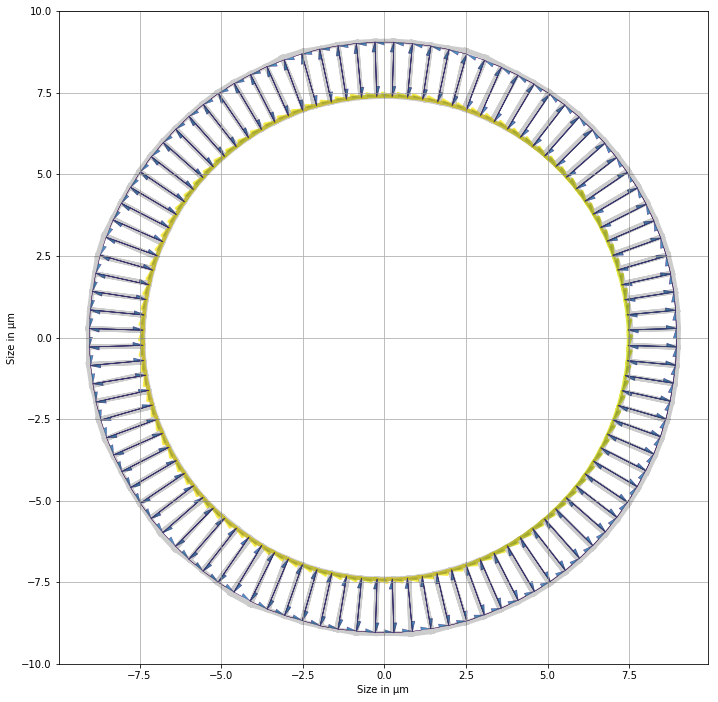

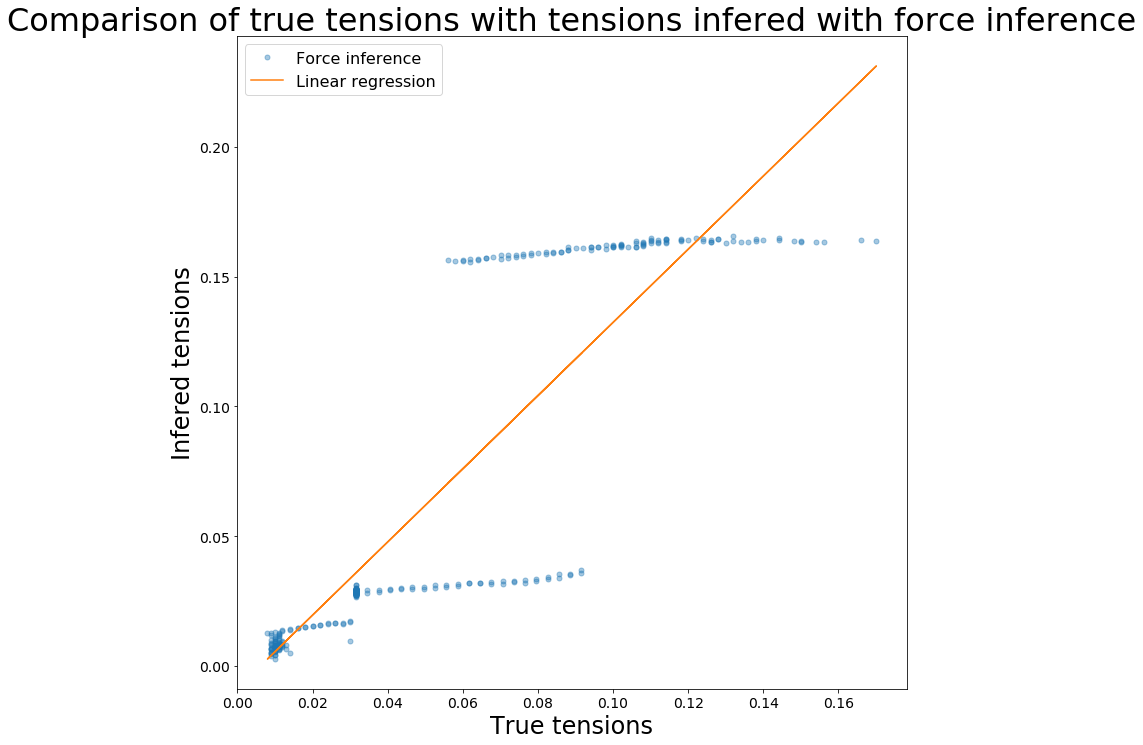

R value : 0.8845777239629554 
Standard error : 0.02723681832609207


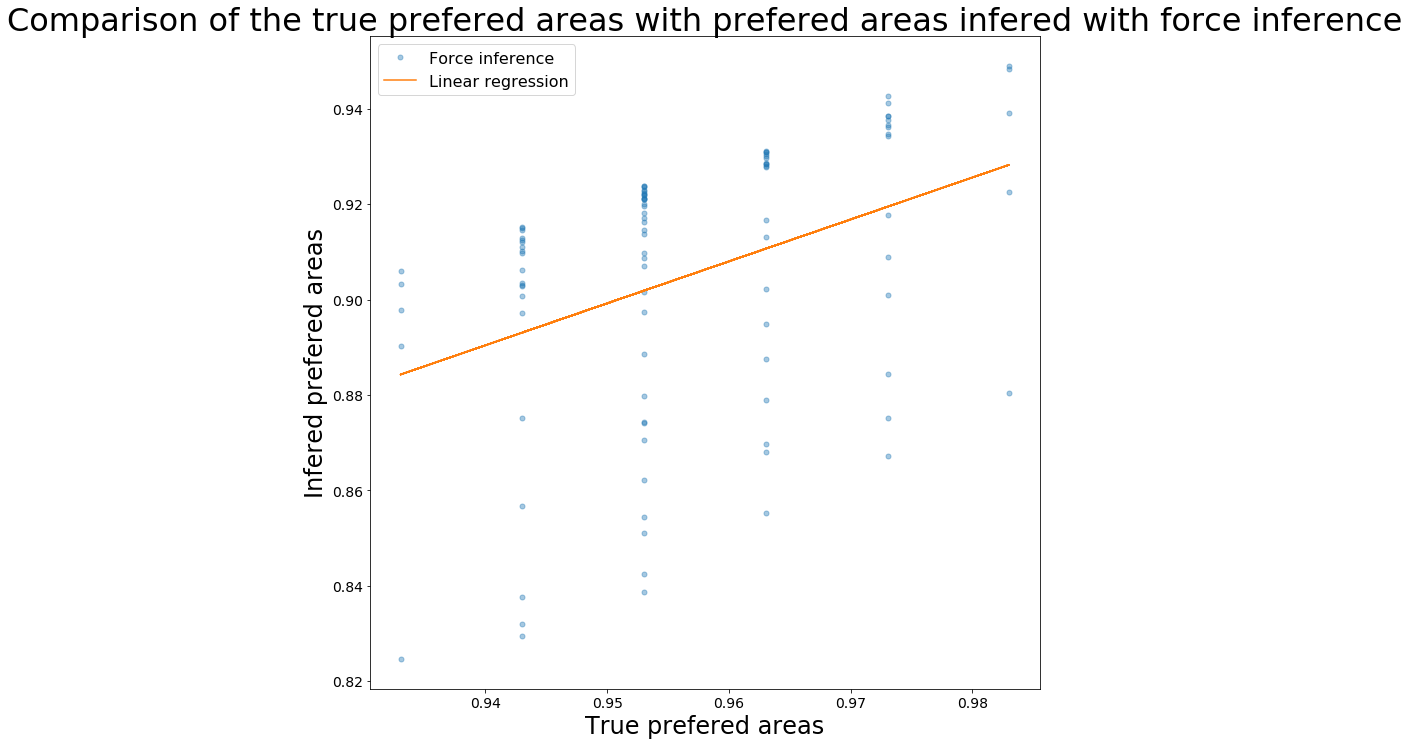

R value : 0.3786142893572453 
Standard error : 0.013283204939429694


In [6]:
#Calling force inference
fi_init = infer_forces(organo, t_sum=opt_cst)
fi_t = fi_init['tensions']
fi_a = fi_init['areas']
organo_fi = organo.copy()
#Setting fi results in the mesh
organo_fi.edge_df.loc[:, 'line_tension'] = prepare_tensions(organo_fi, fi_t)
organo_fi.face_df.loc[:, 'prefered_area'] = organo_fi.face_df.area + fi_a[:-1]
organo_fi.settings['lumen_prefered_vol'] = organo_fi.settings['lumen_volume'] + fi_a[-1]
#Solving for energy min and displaying
Solver.find_energy_min(organo_fi, geom, model)
print_tensions(organo_fi, organo)
print('\nDistance from th org to exp org: ', np.sum(_distance(organo_fi, organo)))
rendering_results(organo, organo.edge_df.line_tension[:3*organo.Nf], fi_t,
                  'Comparison of true tensions with tensions infered with force inference',
                  'True tensions', 'Infered tensions', ('Force inference', 'Linear regression'))
rendering_results(organo, organo.face_df.prefered_area, fi_a[:-1]+organo.face_df.area,
                  'Comparison of the true prefered areas with prefered areas infered with force inference',
                  'True prefered areas', 'Infered prefered areas', ('Force inference', 'Linear regression'))

## Procédure de recalage

La résolution du problème de recalage est faite avec Levenberg-Marquardt.

In [7]:
start = time.time()
lm_opt = {'method': 'lm','xtol':1e-5,'ftol': 1e-4, 'verbose': 0}
# Setting the initial point as the force inference result.
fi_init_array = np.r_[fi_t, organo_fi.face_df.area + fi_a[:-1],
                      organo_fi.settings['lumen_volume'] + fi_a[-1]]
rec_res = adjust_parameters(organo.copy(), fi_init_array, **lm_opt)
end = time.time() - start
print("Solving time = ", end,
      "   |   f(x*) = ", np.sum(rec_res.fun))

Solving time =  14689.80158162117    |   f(x*) =  3.278145294464016



Distance from th org to exp org:  3.1366170858012783


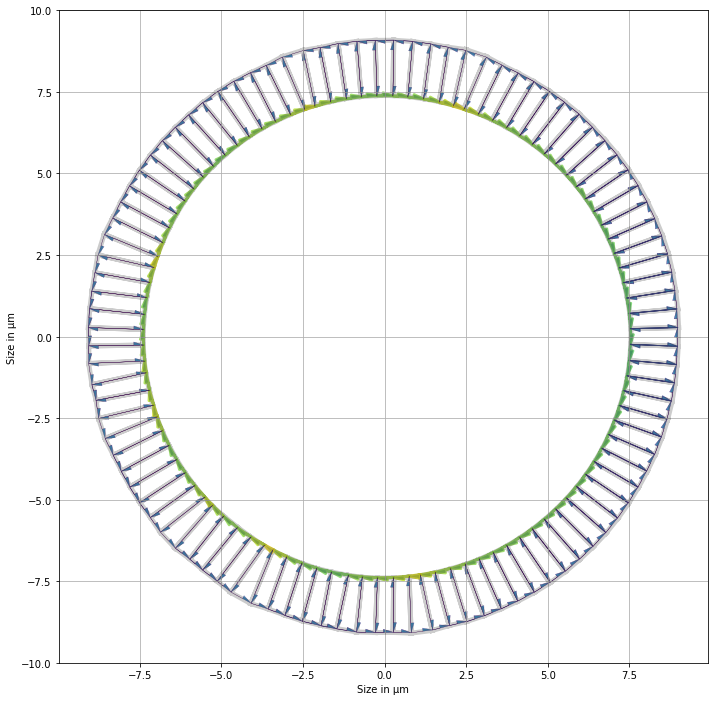

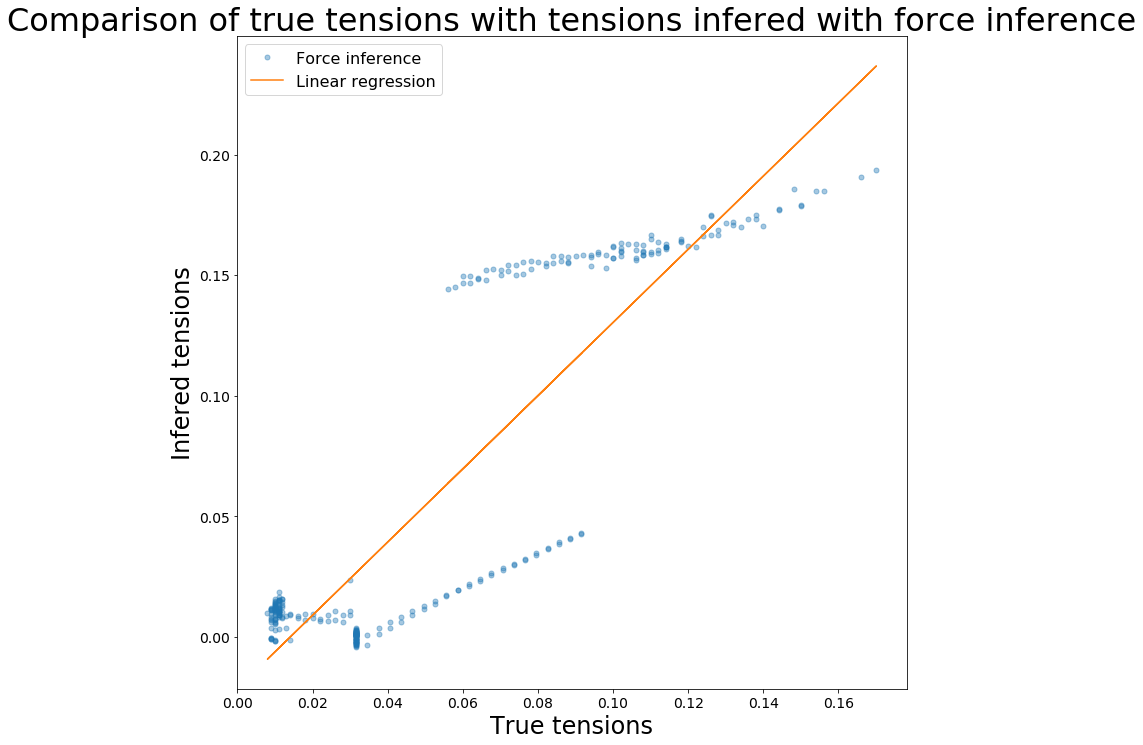

R value : 0.8861962993339019 
Standard error : 0.02907081026388695


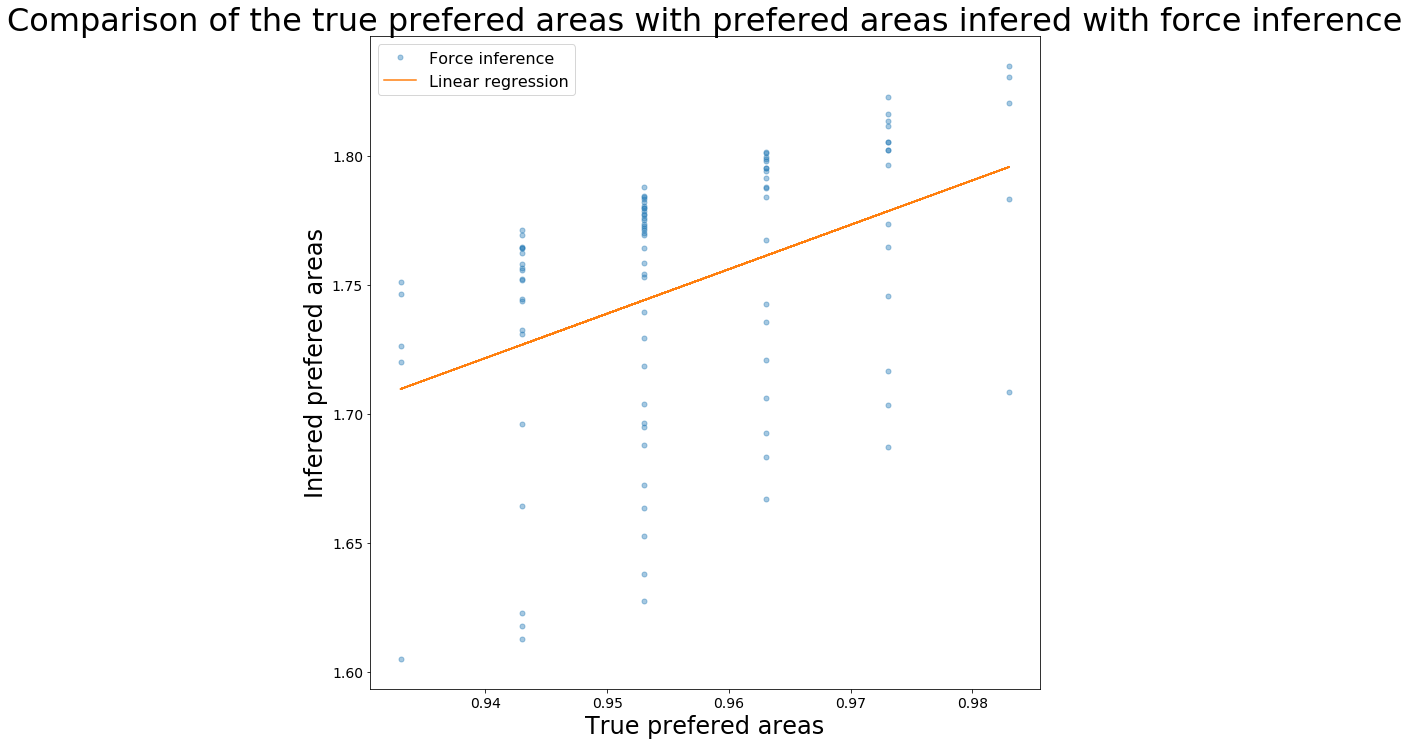

R value : 0.40956532643049226 
Standard error : 0.023697578516773225


In [8]:
rec_t = rec_res.x[:organo.Nf*3]
rec_a = rec_res.x[-(organo.Nf+1):]

organo_rec = organo.copy()
#Setting fi results in the mesh
organo_rec.edge_df.loc[:, 'line_tension'] = prepare_tensions(organo_rec, rec_t)
organo_rec.face_df.loc[:, 'prefered_area'] = rec_a[:-1]
organo_rec.settings['lumen_prefered_vol'] = rec_a[-1]
#Solving for energy min and displaying
Solver.find_energy_min(organo_rec, geom, model)
print_tensions(organo_rec, organo)
print('\nDistance from th org to exp org: ', np.sum(_distance(organo_rec, organo)))
rendering_results(organo, organo.edge_df.line_tension[:3*organo.Nf], rec_t,
                  'Comparison of true tensions with tensions infered with force inference',
                  'True tensions', 'Infered tensions', ('Force inference', 'Linear regression'))
rendering_results(organo, organo.face_df.prefered_area, rec_a[:-1]+organo.face_df.area,
                  'Comparison of the true prefered areas with prefered areas infered with force inference',
                  'True prefered areas', 'Infered prefered areas', ('Force inference', 'Linear regression'))

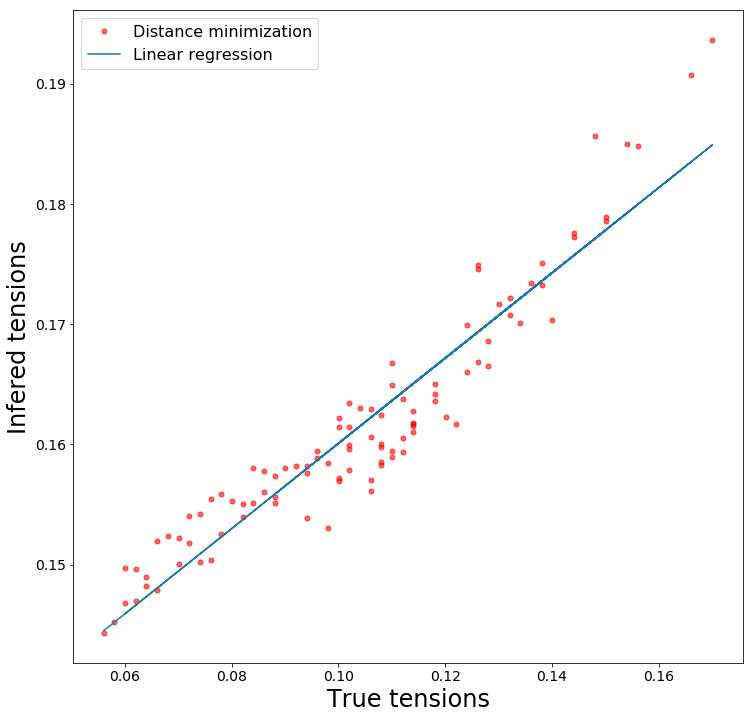

R value : 0.9473558069199194 
Standard error : 0.001573436744220307


In [12]:
from scipy import stats
x_data = organo.edge_df.line_tension[:organo.Nf]
y_data = rec_t[:organo.Nf]
title = ''
xlabel = 'True tensions'
ylabel = 'Infered tensions'
legend = ('Distance minimization', 'Linear regression')
slope, intercept, r_value, p_value, std_err = stats.linregress(x_data,
                                                               y_data)
fig, ax = plt.subplots()
plt.plot(x_data, y_data, 'r.', markersize=10, alpha=0.6)
plt.plot(x_data, intercept+slope*np.array(x_data), '-')
plt.title(title, fontdict={'fontsize': 32})
plt.legend(legend, loc='upper left', fontsize=16)
plt.xlabel(xlabel, fontdict={'fontsize': 24})
plt.ylabel(ylabel, fontdict={'fontsize': 24})
fig.set_size_inches(12, 12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
std = np.sum(np.power(intercept+slope*np.array(x_data)-y_data, 2))
print('R value :', r_value,
      '\nStandard error :', (std/organo.Ne)**0.5)

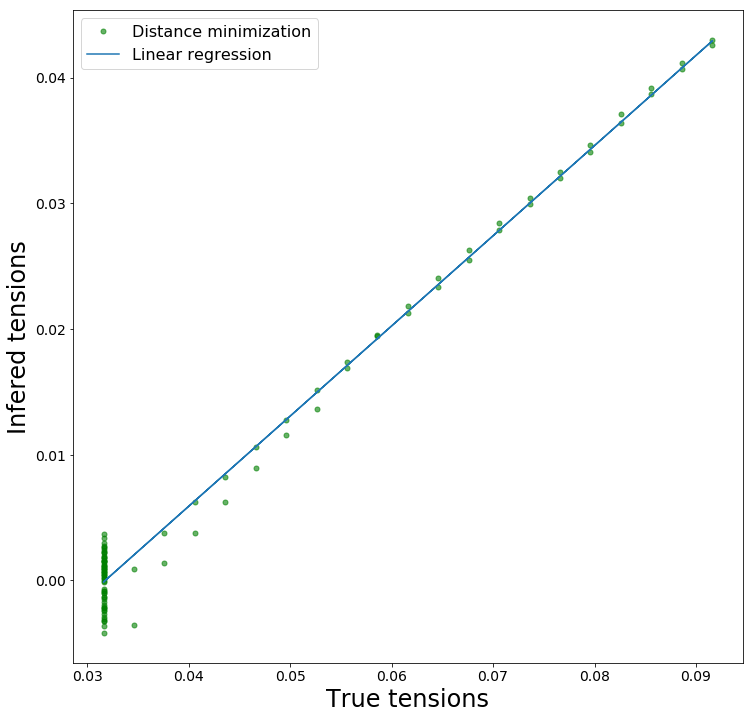

R value : 0.9921364021801398 
Standard error : 0.0008560814332692821


In [13]:
from scipy import stats
x_data = organo.edge_df.line_tension[2*organo.Nf:3*organo.Nf]
y_data = rec_t[2*organo.Nf:3*organo.Nf]
title = ''
xlabel = 'True tensions'
ylabel = 'Infered tensions'
legend = ('Distance minimization', 'Linear regression')
slope, intercept, r_value, p_value, std_err = stats.linregress(x_data,
                                                               y_data)
fig, ax = plt.subplots()
plt.plot(x_data, y_data, 'g.', markersize=10, alpha=0.6)
plt.plot(x_data, intercept+slope*np.array(x_data), '-')
plt.title(title, fontdict={'fontsize': 32})
plt.legend(legend, loc='upper left', fontsize=16)
plt.xlabel(xlabel, fontdict={'fontsize': 24})
plt.ylabel(ylabel, fontdict={'fontsize': 24})
fig.set_size_inches(12, 12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
std = np.sum(np.power(intercept+slope*np.array(x_data)-y_data, 2))
print('R value :', r_value,
      '\nStandard error :', (std/organo.Ne)**0.5)

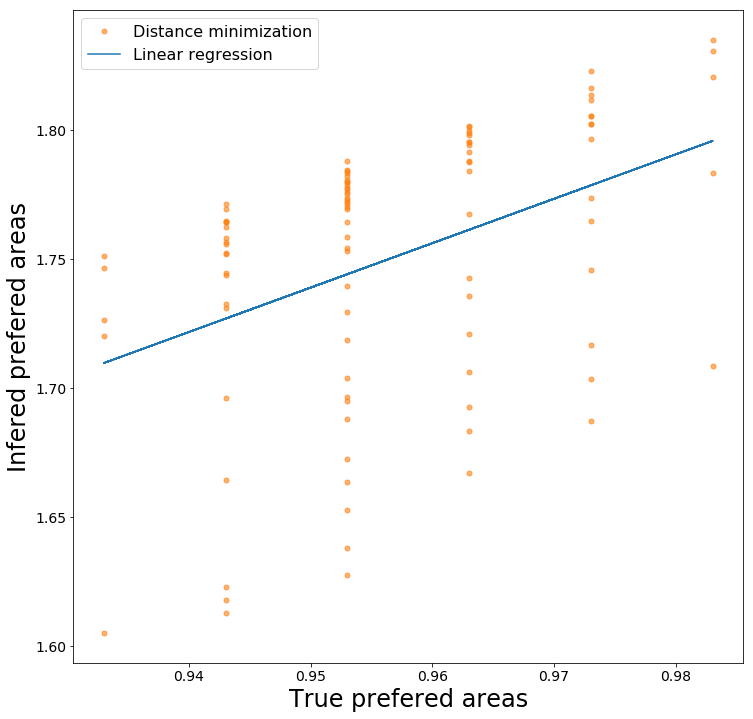

In [11]:
x_data = organo.face_df.prefered_area
y_data = rec_a[:-1]+organo.face_df.area
title = ''
xlabel = 'True prefered areas'
ylabel = 'Infered prefered areas'
legend = ('Distance minimization', 'Linear regression')
slope, intercept, r_value, p_value, std_err = stats.linregress(x_data,
                                                               y_data)
fig, ax = plt.subplots()
plt.plot(x_data, y_data, '.', markersize=10, alpha=0.6, color='tab:orange')
plt.plot(x_data, intercept+slope*np.array(x_data), '-')
plt.title(title, fontdict={'fontsize': 32})
plt.legend(legend, loc='upper left', fontsize=16)
plt.xlabel(xlabel, fontdict={'fontsize': 24})
plt.ylabel(ylabel, fontdict={'fontsize': 24})
fig.set_size_inches(12, 12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
std = np.sum(np.power(intercept+slope*np.array(x_data)-y_data, 2))